## Dividir el dataset en conjuntos (entrenamiento y testing)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("../python-ml-course/datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 5., 16., 18., 37., 39., 34., 30., 12.,  6.,  3.]),
 array([-2.2051537 , -1.71200217, -1.21885064, -0.7256991 , -0.23254757,
         0.26060396,  0.75375549,  1.24690702,  1.74005856,  2.23321009,
         2.72636162]),
 <a list of 10 Patch objects>)

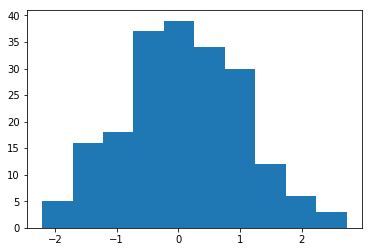

In [4]:
plt.hist(a)

In [5]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [6]:
len(training), len(testing)

(155, 45)

In [7]:
lm = smf.ols(formula = "Sales~TV+Radio", data = training).fit()

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     652.1
Date:                Wed, 15 May 2019   Prob (F-statistic):           2.61e-75
Time:                        14:34:35   Log-Likelihood:                -298.86
No. Observations:                 155   AIC:                             603.7
Df Residuals:                     152   BIC:                             612.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9151      0.342      8.514      0.000       2.239       3.592
TV             0.0451      0.002     28.136      0.000       0.042       0.048
Radio          0.1922      0.009     20.884      0.000       0.174       0.210
==============================================================================
Omnibus:                       65.651   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.456
Skew:                          -1.624   Prob(JB):                     2.46e-50
Kurtosis:                       7.982   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### sales = 2.9151 + (0.0451 * TV )+ (0.1922 * Radio)

### Validación del modelo con el conjunto de testing

In [10]:
sales_pred = lm.predict(testing)
sales_pred

2      12.512928
6      11.814011
7      12.106814
9      12.432009
11     17.217361
13      8.776038
22      6.566661
26     14.995551
28     19.352131
37     15.780645
44      8.987199
46      8.866054
51      9.291301
52     20.695872
56      8.645121
60      5.713990
64     17.057586
67     11.988645
68     18.914511
70     17.781777
76      4.463701
78      8.905317
81     14.525547
87     15.714087
90      9.917952
98     24.119308
112    13.804396
120    14.442862
122    13.485748
125     9.118390
127     6.534612
131    15.441251
132     8.521794
135    14.127921
137    20.821844
138     9.833487
142    19.247283
148    12.375386
161    13.663286
165    14.151817
182     6.546953
183    24.159067
185    20.834826
187    17.055563
192     4.479327
dtype: float64

In [11]:
SSD = sum((testing["Sales"] - sales_pred)**2)
SSD

129.0202993896217

In [12]:
RSE = np.sqrt(SSD/(len(testing)-3))
RSE

1.7526870485711612

In [14]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.13237817587395476

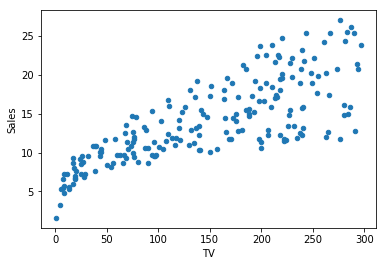

In [32]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y = "Sales")
#plt.plot(pd.DataFrame(data["TV"]), sales_pred, c='red', linewidth = 2)

In [ ]:
from Ipython.display import Image
